In [1]:
%matplotlib notebook
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns

In [3]:
g = 9.81
dt = 0.1
theta = np.arange(0, 2*np.pi, 0.01)

In [4]:
class Ball:
    def __init__(self, x, y,vx=0, vy=0, radius=1, xlim=[0,1], ylim=[0,1]):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.radius = radius
        self.xlim = xlim
        self.ylim = ylim
        
    
    def update(self):
        self.vx = self.vx
        self.vy = self.vy - g * dt
        
        self.x = self.x + self.vx * dt
        self.y = self.y + self.vy * dt

<IPython.core.display.Javascript object>


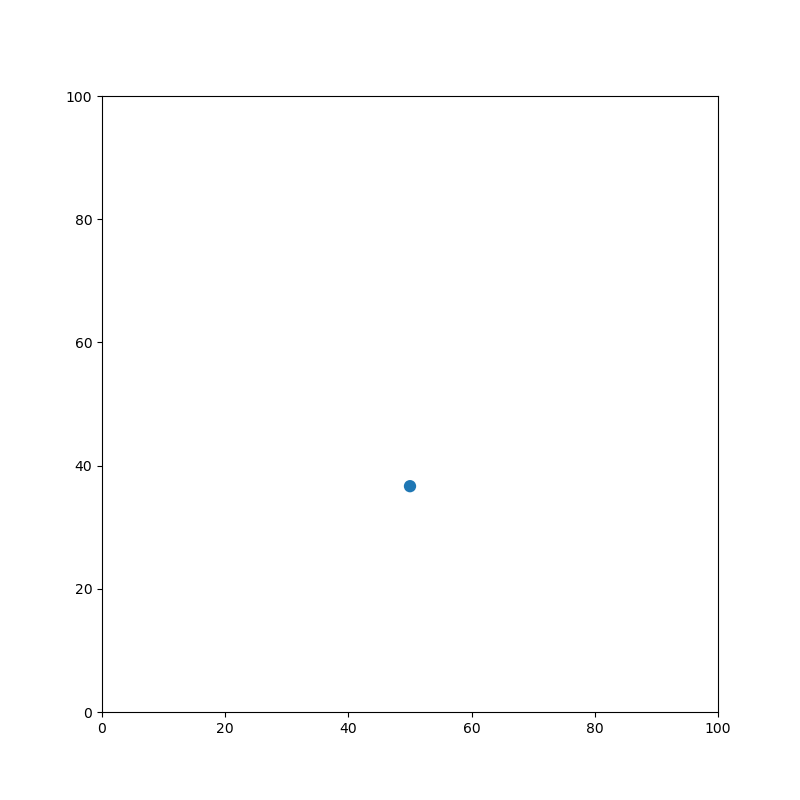

In [17]:
xmax = 100
ymax = 100

ball= Ball(x=xmax/2, y=ymax/2, radius=1, xlim=[0,xmax], ylim=[0,ymax])

fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim(0,xmax)
ax.set_ylim(0,ymax)
ax.set_aspect('equal', adjustable='box')

circle = plt.Circle((ball.x, ball.y), ball.radius)
ax.add_artist(circle)

def animate(frame_num):
    ax.cla()
    ax.set_xlim(0,xmax)
    ax.set_ylim(0,ymax)
    ax.set_aspect('equal', adjustable='box')
    
    ball.update()
    circle = plt.Circle((ball.x, ball.y), ball.radius)
    ax.add_artist(circle)
    return circle

anim = FuncAnimation(fig, animate, frames=60, interval=10)
plt.show()

In [4]:
class Ball:
    def __init__(self, x, y,vx=0, vy=0, radius=1, xlim=[0,1], ylim=[0,1]):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.radius = radius
        self.xlim = xlim
        self.ylim = ylim
        
    
    def update(self):
        self.vx = self.vx
        self.vy = self.vy - g * dt
        
        self.x = self.x + self.vx * dt
        self.y = self.y + self.vy * dt
        
        if self.x - self.radius < self.xlim[0]:
            self.vx = -self.vx
            self.x = 2 * self.radius - self.x
        if self.x + self.radius > self.xlim[1]:
            self.vx = -self.vx
            self.x = 2*self.xlim[1] - (2 * self.radius + self.x)
        if self.y - self.radius < self.ylim[0]:
            self.vy = -self.vy
            self.y = 2 * self.radius - self.y
        if self.y + self.radius > self.ylim[1]:
            self.vy = -self.vy
            self.y = 2 * self.ylim[1] - (2 * self.radius + self.y)

<IPython.core.display.Javascript object>


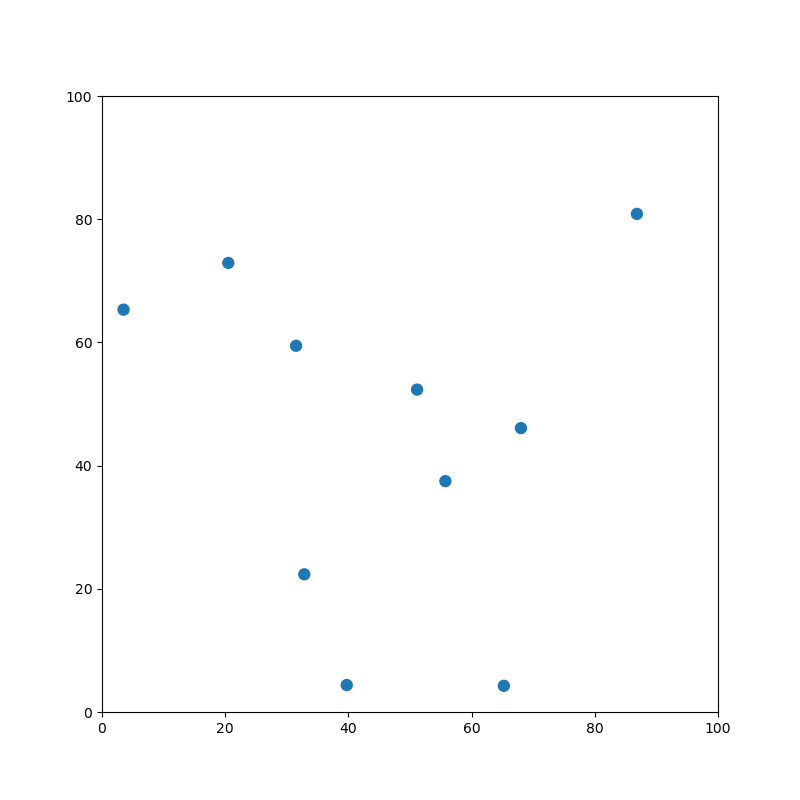

In [13]:
xmax = 100
ymax = 100
ballmax = 10
balls = []

for _ in range(ballmax):
    theta = 30*np.random.randn(1) * np.pi/180
    speed = 30*np.random.randn(1)
    vy = speed * np.cos(theta)
    vx = speed * np.sin(theta)
    balls.append(Ball(x=xmax/2, y=ymax/2, vx=vx, vy=vy, radius=1, xlim=[0,xmax], ylim=[0,ymax]))

fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim(0,xmax)
ax.set_ylim(0,ymax)
ax.set_aspect('equal', adjustable='box')

for i in range(ballmax):
    circle = plt.Circle((balls[i].x, balls[i].y), balls[i].radius)
    ax.add_artist(circle)

def animate(frame_num):
    ax.cla()
    ax.set_xlim(0,xmax)
    ax.set_ylim(0,ymax)
    ax.set_aspect('equal', adjustable='box')
    
    for i in range(ballmax):
        balls[i].update()
        circle = plt.Circle((balls[i].x, balls[i].y), balls[i].radius)
        ax.add_artist(circle)
    return circle

anim = FuncAnimation(fig, animate, frames=60, interval=10)
plt.show()